In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

import sys
from fastai.vision.all import *

sys.path.append("../PycastWorld")
sys.path.append("../Gym")
sys.path.append("../Notebooks")

from gym_pycastworld.PycastWorldEnv import PycastWorldEnv
from cmd_classes_funcs_Marchese import *

/home/CAMPUS/cemb2020/anaconda3/envs/arcslab/lib/python3.8/site-packages/fastbook/__init__.py:18: UserWarning: Missing `graphviz` - please run `conda install fastbook`
  except ModuleNotFoundError: warn("Missing `graphviz` - please run `conda install fastbook`")


In [2]:
# loading in trained NN
net = MyModel_next50()
net.load_state_dict(torch.load('cmd_torch_next50_.pth'))
net.eval()

MyModel_next50(
  (cnn): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [3]:
steps_per_episode = 2000

In [4]:
env = PycastWorldEnv("../Mazes/maze_test00.txt", 320, 240)

In [5]:
# Grab the initial observation (not used here)
observation = env.reset()
frames = [observation.copy()]

In [6]:
# Variable to keep track of the previous move
prev_move = 1
# Variable to keep track of current move's name
action_name = 'straight'

In [7]:
for t in range(steps_per_episode):

    # Remove this render call when actually training;
    # it will needlessly slow things down if you don't want
    # to watch.
    # TODO: cannot render on HPC
    # env.render()
    
    inp = (tensor(observation/255).permute(2,0,1).unsqueeze(0), tensor(prev_move).unsqueeze(0))
    # Use a trained neural network to select the action
    output = net(inp)
    
    # Output is a multi-value tensor; in order to know the action_index
    # we must take max and see what move is associated with that max
    
    # Getting the most probable move
    #print(output)
    action_index = int(torch.argmax(output[0]))
                
    # Looking at what move has that probability
    if action_index == 0:
        action_name = 'left'
    elif action_index == 1:
        # Must account for differing move indexing
        # Model sees 'right' as index 1 and 'straight' as index 2;
        # this needs to be flipped
        action_index = 2
        action_name = 'right'
    else:
        action_index = 1
        action_name = 'straight'
        
    """
    # Account for left-right stuck mistake
    if action_index == 0 and prev_move == 2:
        action_index = 2
    elif action_index == 2 and prev_move == 0:
        action_index = 0"""
    
    # Update previous move
    prev_move = action_index
    
    print(action_name + " " + str(action_index))

    # Advance the world one step. We could also have the step
    # method advance more than step so that it takes fewer
    # steps in total to get to the end goal.
    observation, reward, done, info = env.step(action_index)
    frames.append(observation.copy())
    # Check if we reached the end goal
    if done:
        print(f"  Found goal in {t+1} steps")
        break
        
plt.imshow(observation)
print(f"  Ended at position {env.world.get_x()}, {env.world.get_y()}")
env.close()

straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
left 0
straight 1
straight 1
straight 1
straight 1
straight 1
left 0
left 0
left 0
left 0
left 0
left 0
left 0
left 0
left 0
left 0
left 0
left 0
left 0
left 0
left 0
left 0
left 0
left 0
left 0
left 0
left 0
left 0
left 0
left 0
left 0
left 0
left 0
left 0
left 0
straight 1
left 0
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
right 2
right 2
right 2
right 2
right 2
right 2
right 2
right 2
righ

right 2
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
straight 1
st

KeyboardInterrupt: 

In [ ]:
plt.imshow(frames[0])

<IPython.core.display.Javascript object>


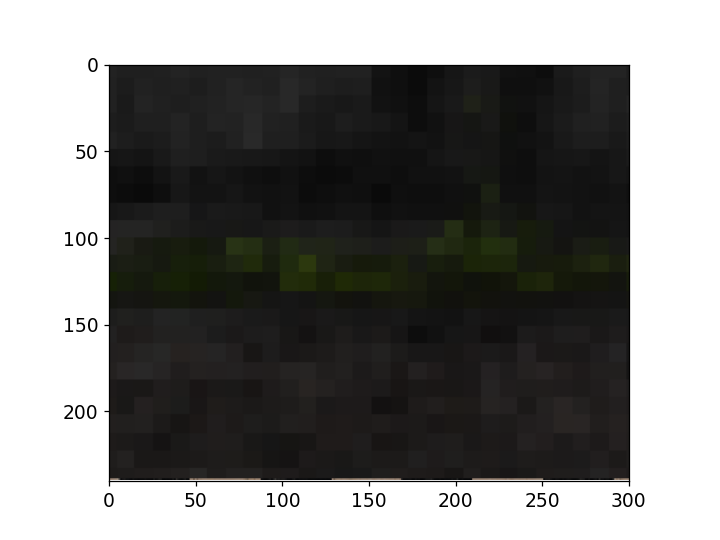

AttributeError: 'pycaster.PycastWorld' object has no attribute 'getX'

In [8]:
# TODO: matplotlib animation
# https://matplotlib.org/stable/api/animation_api.html
fig, ax = plt.subplots()
ax.set(xlim=(0,300), ylim=(240,0))

frame = plt.imshow(frames[0])
print(f"  Ended at position {env.world.getX()}, {env.world.getY()}")

In [9]:
def init():
    frame.set_data(frames[0])
    return [frame]

def animate(i):
    frame.set_array(i)
    return [frame]

In [10]:
from IPython.display import HTML

ani = FuncAnimation(fig, animate, frames[::25], init_func = init, interval = 200)
HTML(ani.to_jshtml())

In [ ]:
#ani.save("prediction_next" + ".gif")